In [ ]:
if (!requireNamespace("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

BiocManager::install("GenomicAlignments")
BiocManager::install("Rsubread")
BiocManager::install("msa")
BiocManager::install("girafe")
BiocManager::install("odseq")
BiocManager::install("Rsamtools")
BiocManager::install("bamsignals")
BiocManager::install("rtracklayer")
BiocManager::install("Sushi")
BiocManager::install("GenomicRanges")

In [ ]:
library(GenomicAlignments)
library(Rsubread)
library(msa)
library(girafe)
library(odseq)
library(Rsamtools)
library(bamsignals)
library(rtracklayer)
library(Sushi)
library(GenomicRanges)

## Rsamtools

In [29]:
bamPath <- "../../wallaby/workflows/cromwell-final-outputs/reads-to-donor_MUd_UMr.bam"
bamFile <- BamFile("../../wallaby/workflows/cromwell-final-outputs/reads-to-donor_MUd_UMr.bam")
bamFile

class: BamFile 
path: ../../wallaby/workflows/cromwell-final-outpu.../reads-to-donor_MUd_UMr.bam
index: NA
isOpen: FALSE 
yieldSize: NA 
obeyQname: FALSE 
asMates: FALSE 
qnamePrefixEnd: NA 
qnameSuffixStart: NA 

In [30]:
seqinfo(bamFile)

Seqinfo object with 1 sequence from an unspecified genome:
  seqnames    seqlengths isCircular genome
  NC_002516.2    6264404         NA   <NA>

In [31]:
aln <- scanBam(bamFile)
length(aln)

[1] 1

In [32]:
aln <- aln[[1]]
names(aln)

[1] "qname"  "flag"   "rname"  "strand" "pos"    "qwidth" "mapq"   "cigar" 
 [9] "mrnm"   "mpos"   "isize"  "seq"    "qual"

In [33]:
lapply(aln, function(xx) xx[1])


$qname
[1] "SRR5377828.1437390"

$flag
[1] 73

$rname
[1] NC_002516.2
Levels: NC_002516.2

$strand
[1] +
Levels: + - *

$pos
[1] 4788845

$qwidth
[1] 101

$mapq
[1] 0

$cigar
[1] "101M"

$mrnm
[1] NC_002516.2
Levels: NC_002516.2

$mpos
[1] NA

$isize
[1] NA

$seq
  A DNAStringSet instance of length 1
    width seq
[1]   101 GCCTCACGGGCAATTAGTACTGGTTAGCTCAACG...CGTAGTCTTCGACGGCCCTTCAGGGGAATCAAG

$qual
  A PhredQuality instance of length 1
    width seq
[1]   101 BBBFFFFFFFFFFIIIIFFIIIIIIIIIIIIIFI...FFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFF


In [34]:
quickBamFlagSummary(bamFile)

                                group |    nb of |    nb of | mean / max
                                   of |  records |   unique | records per
                              records | in group |   QNAMEs | unique QNAME
All records........................ A |       74 |       37 |    2 / 2
  o template has single segment.... S |        0 |        0 |   NA / NA
  o template has multiple segments. M |       74 |       37 |    2 / 2
      - first segment.............. F |       37 |       37 |    1 / 1
      - last segment............... L |       37 |       37 |    1 / 1
      - other segment.............. O |        0 |        0 |   NA / NA

Note that (S, M) is a partitioning of A, and (F, L, O) is a partitioning of M.
Indentation reflects this.

Details for group M:
  o record is mapped.............. M1 |       37 |       37 |    1 / 1
      - primary alignment......... M2 |       37 |       37 |    1 / 1
      - secondary alignment....... M3 |        0 |        0 |   NA / NA
  o rec

In [ ]:
BiocManager::install("BSgenome.Hsapiens.UCSC.hg38")
BiocManager::install("BSgenome.Hsapiens.NCBI.GRCh38")
BiocManager::install("TxDb.Hsapiens.UCSC.hg38.knownGene")

In [31]:
library(repr)
library("BSgenome.Hsapiens.UCSC.hg38")
library("BSgenome.Hsapiens.NCBI.GRCh38")
library("TxDb.Hsapiens.UCSC.hg38.knownGene")

- The blast files have the actual existing files

In [361]:
MMd_MMr.to_rec.bam <- "../../wallaby/workflows/cromwell-final-outputs/reads-to-recipient_MMd_MMr.bam.complex.bam"
MUd_UMr.to_rec.bam <- "../../wallaby/workflows/cromwell-final-outputs/reads-to-recipient_MUd_UMr.bam.complex.bam"
UMd_UUr.to_rec.bam <- "../../wallaby/workflows/cromwell-final-outputs/reads-to-recipient_UMd_UUr.bam.complex.bam"
UUd_UUr.to_rec.bam <- "../../wallaby/workflows/cromwell-final-outputs/reads-to-recipient_UUd_UUr.bam.complex.bam"
MMd_MUr.to_rec.bam <- "../../wallaby/workflows/cromwell-final-outputs/reads-to-recipient_MMd_MUr.bam.complex.bam"
MUd_UUr.to_rec.bam <- "../../wallaby/workflows/cromwell-final-outputs/reads-to-recipient_MUd_UUr.bam.complex.bam"
UUd_MMr.to_rec.bam <- "../../wallaby/workflows/cromwell-final-outputs/reads-to-recipient_UUd_MMr.bam.complex.bam"
MMd_UUr.to_rec.bam <- "../../wallaby/workflows/cromwell-final-outputs/reads-to-recipient_MMd_UUr.bam.complex.bam"
UMd_MMr.to_rec.bam <- "../../wallaby/workflows/cromwell-final-outputs/reads-to-recipient_UMd_MMr.bam.complex.bam"
UUd_MUr.to_rec.bam <- "../../wallaby/workflows/cromwell-final-outputs/reads-to-recipient_UUd_MUr.bam.complex.bam"
MUd_MMr.to_rec.bam <- "../../wallaby/workflows/cromwell-final-outputs/reads-to-recipient_MUd_MMr.bam.complex.bam"
UMd_MUr.to_rec.bam <- "../../wallaby/workflows/cromwell-final-outputs/reads-to-recipient_UMd_MUr.bam.complex.bam"
UUd_UMr.to_rec.bam <- "../../wallaby/workflows/cromwell-final-outputs/reads-to-recipient_UUd_UMr.bam.complex.bam"
MMd_MMr.to_rec.bed.gr <- import("../../wallaby/workflows/cromwell-final-outputs/reads-to-recipient_MMd_MMr.bam.complex.bed")
MUd_UMr.to_rec.bed.gr <- import("../../wallaby/workflows/cromwell-final-outputs/reads-to-recipient_MUd_UMr.bam.complex.bed")
UMd_UUr.to_rec.bed.gr <- import("../../wallaby/workflows/cromwell-final-outputs/reads-to-recipient_UMd_UUr.bam.complex.bed")
UUd_UUr.to_rec.bed.gr <- import("../../wallaby/workflows/cromwell-final-outputs/reads-to-recipient_UUd_UUr.bam.complex.bed")
MMd_MUr.to_rec.bed.gr <- import("../../wallaby/workflows/cromwell-final-outputs/reads-to-recipient_MMd_MUr.bam.complex.bed")
MUd_UUr.to_rec.bed.gr <- import("../../wallaby/workflows/cromwell-final-outputs/reads-to-recipient_MUd_UUr.bam.complex.bed")
UUd_MMr.to_rec.bed.gr <- import("../../wallaby/workflows/cromwell-final-outputs/reads-to-recipient_UUd_MMr.bam.complex.bed")
MMd_UUr.to_rec.bed.gr <- import("../../wallaby/workflows/cromwell-final-outputs/reads-to-recipient_MMd_UUr.bam.complex.bed")
UMd_MMr.to_rec.bed.gr <- import("../../wallaby/workflows/cromwell-final-outputs/reads-to-recipient_UMd_MMr.bam.complex.bed")
UUd_MUr.to_rec.bed.gr <- import("../../wallaby/workflows/cromwell-final-outputs/reads-to-recipient_UUd_MUr.bam.complex.bed")
MUd_MMr.to_rec.bed.gr <- import("../../wallaby/workflows/cromwell-final-outputs/reads-to-recipient_MUd_MMr.bam.complex.bed")
UMd_MUr.to_rec.bed.gr <- import("../../wallaby/workflows/cromwell-final-outputs/reads-to-recipient_UMd_MUr.bam.complex.bed")
UUd_UMr.to_rec.bed.gr <- import("../../wallaby/workflows/cromwell-final-outputs/reads-to-recipient_UUd_UMr.bam.complex.bed")

In [363]:
MMd_MMr.to_don.bam <- "../../wallaby/workflows/cromwell-final-outputs/reads-to-donor_MMd_MMr.bam.complex.bam"
MUd_UMr.to_don.bam <- "../../wallaby/workflows/cromwell-final-outputs/reads-to-donor_MUd_UMr.bam.complex.bam"
UMd_UUr.to_don.bam <- "../../wallaby/workflows/cromwell-final-outputs/reads-to-donor_UMd_UUr.bam.complex.bam"
UUd_UUr.to_don.bam <- "../../wallaby/workflows/cromwell-final-outputs/reads-to-donor_UUd_UUr.bam.complex.bam"
MMd_MUr.to_don.bam <- "../../wallaby/workflows/cromwell-final-outputs/reads-to-donor_MMd_MUr.bam.complex.bam"
MUd_UUr.to_don.bam <- "../../wallaby/workflows/cromwell-final-outputs/reads-to-donor_MUd_UUr.bam.complex.bam"
UUd_MMr.to_don.bam <- "../../wallaby/workflows/cromwell-final-outputs/reads-to-donor_UUd_MMr.bam.complex.bam"
MMd_UUr.to_don.bam <- "../../wallaby/workflows/cromwell-final-outputs/reads-to-donor_MMd_UUr.bam.complex.bam"
UMd_MMr.to_don.bam <- "../../wallaby/workflows/cromwell-final-outputs/reads-to-donor_UMd_MMr.bam.complex.bam"
UUd_MUr.to_don.bam <- "../../wallaby/workflows/cromwell-final-outputs/reads-to-donor_UUd_MUr.bam.complex.bam"
MUd_MMr.to_don.bam <- "../../wallaby/workflows/cromwell-final-outputs/reads-to-donor_MUd_MMr.bam.complex.bam"
UMd_MUr.to_don.bam <- "../../wallaby/workflows/cromwell-final-outputs/reads-to-donor_UMd_MUr.bam.complex.bam"
UUd_UMr.to_don.bam <- "../../wallaby/workflows/cromwell-final-outputs/reads-to-donor_UUd_UMr.bam.complex.bam"
MMd_MMr.to_don.bed.gr <- import("../../wallaby/workflows/cromwell-final-outputs/reads-to-donor_MMd_MMr.bam.complex.bed")
MUd_UMr.to_don.bed.gr <- import("../../wallaby/workflows/cromwell-final-outputs/reads-to-donor_MUd_UMr.bam.complex.bed")
UMd_UUr.to_don.bed.gr <- import("../../wallaby/workflows/cromwell-final-outputs/reads-to-donor_UMd_UUr.bam.complex.bed")
UUd_UUr.to_don.bed.gr <- import("../../wallaby/workflows/cromwell-final-outputs/reads-to-donor_UUd_UUr.bam.complex.bed")
MMd_MUr.to_don.bed.gr <- import("../../wallaby/workflows/cromwell-final-outputs/reads-to-donor_MMd_MUr.bam.complex.bed")
MUd_UUr.to_don.bed.gr <- import("../../wallaby/workflows/cromwell-final-outputs/reads-to-donor_MUd_UUr.bam.complex.bed")
UUd_MMr.to_don.bed.gr <- import("../../wallaby/workflows/cromwell-final-outputs/reads-to-donor_UUd_MMr.bam.complex.bed")
MMd_UUr.to_don.bed.gr <- import("../../wallaby/workflows/cromwell-final-outputs/reads-to-donor_MMd_UUr.bam.complex.bed")
UMd_MMr.to_don.bed.gr <- import("../../wallaby/workflows/cromwell-final-outputs/reads-to-donor_UMd_MMr.bam.complex.bed")
UUd_MUr.to_don.bed.gr <- import("../../wallaby/workflows/cromwell-final-outputs/reads-to-donor_UUd_MUr.bam.complex.bed")
MUd_MMr.to_don.bed.gr <- import("../../wallaby/workflows/cromwell-final-outputs/reads-to-donor_MUd_MMr.bam.complex.bed")
UMd_MUr.to_don.bed.gr <- import("../../wallaby/workflows/cromwell-final-outputs/reads-to-donor_UMd_MUr.bam.complex.bed")
UUd_UMr.to_don.bed.gr <- import("../../wallaby/workflows/cromwell-final-outputs/reads-to-donor_UUd_UMr.bam.complex.bed")

In [49]:
MMd_MUr.to_rec.bam.gr <- import("../../wallaby/workflows/cromwell-final-outputs/reads-to-recipient_MMd_MUr.bam.complex.bed")
MMd_MUr.to_rec.bam.gr <- import("../../wallaby/workflows/cromwell-final-outputs/reads-to-recipient_MUd_UMr.bam.complex.bed")
MMd_MUr.to_rec.bam.gr <- import("../../wallaby/workflows/cromwell-final-outputs/reads-to-recipient_UMd_MUr.bam.complex.bed")

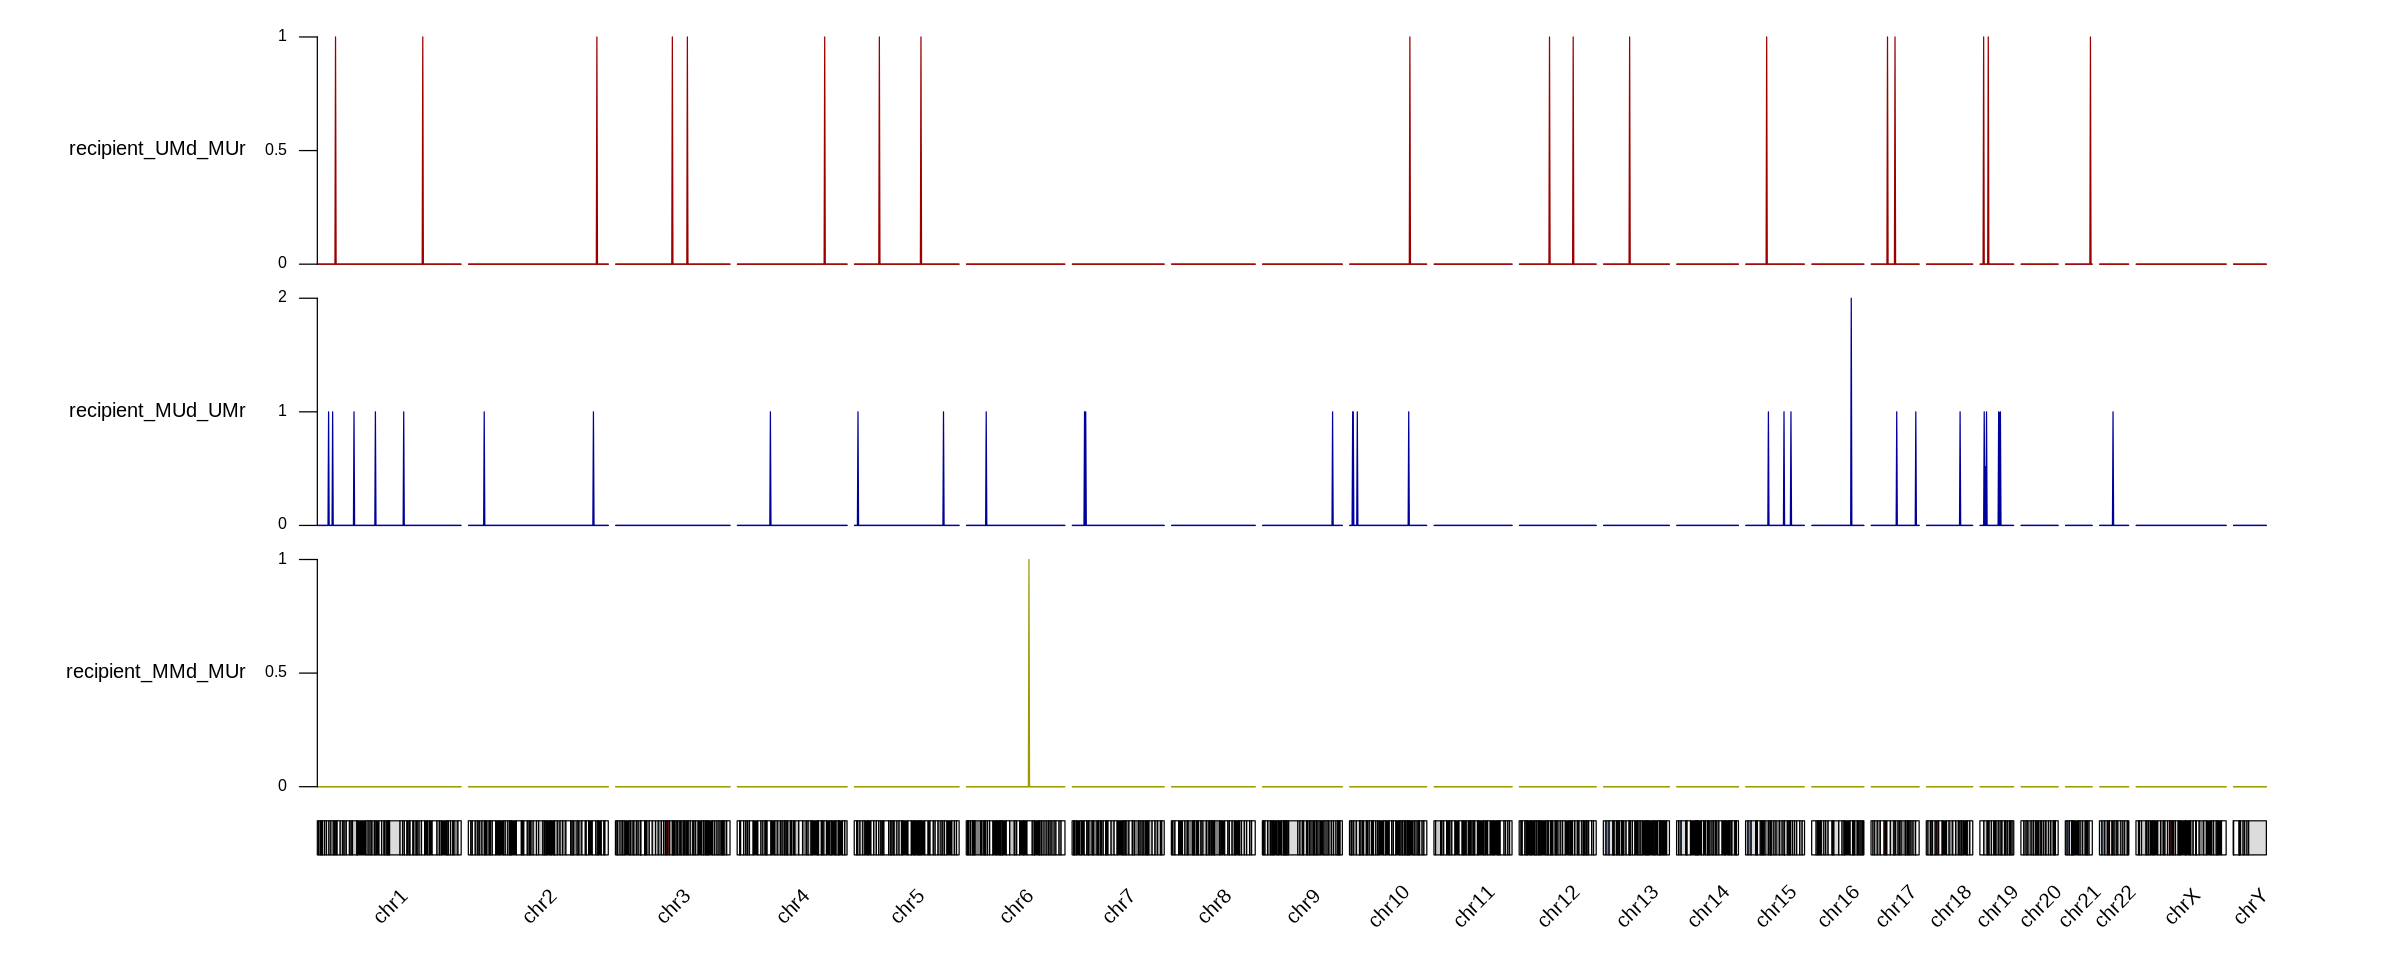

In [366]:
options(repr.plot.width=20, repr.plot.height=8)

plot.type <- 4
tracks <- 3
track_sep <- 0.05
track_width <- 1/tracks
window.size <- 1e6

pp <- getDefaultPlotParams(plot.type=plot.type)
pp$leftmargin <- 0.13
kp <- plotKaryotype(genome="hg38", plot.type = plot.type, plot.params = pp, labels.plotter = NULL)
kpAddChromosomeNames(kp, srt=45)

track_no=1
r0 <- (track_no-1)*track_width+(track_no-1)*track_sep
r1 <- track_no*track_width+(track_no-1)*track_sep
kp <- suppressWarnings(kpPlotDensity(kp, data=MMd_MUr.to_rec.bed.gr, window.size = window.size, col="yellow", r0=r0, r1=r1))
kpAxis(kp, ymax=kp$latest.plot$computed.values$max.density, cex=0.8, r0=r0, r1=r1)
kpAddLabels(kp, labels = "recipient_MMd_MUr", r0=r0, r1=r1, label.margin = 0.03)

track_no=2
r0 <- (track_no-1)*track_width+(track_no-1)*track_sep
r1 <- track_no*track_width+(track_no-1)*track_sep
kp <- suppressWarnings(kpPlotDensity(kp, data=MUd_UMr.to_rec.bed.gr, window.size = window.size, col="blue", r0=r0, r1=r1))
kpAxis(kp, ymax=kp$latest.plot$computed.values$max.density, cex=0.8, r0=r0, r1=r1)
kpAddLabels(kp, labels = "recipient_MUd_UMr", r0=r0, r1=r1, label.margin = 0.03)

track_no=3
r0 <- (track_no-1)*track_width+(track_no-1)*track_sep
r1 <- track_no*track_width+(track_no-1)*track_sep
kp <- suppressWarnings(kpPlotDensity(kp, data=UMd_MUr.to_rec.bed.gr, window.size = window.size, col="red", r0=r0, r1=r1))
kpAxis(kp, ymax=kp$latest.plot$computed.values$max.density, cex=0.8, r0=r0, r1=r1)
kpAddLabels(kp, labels = "recipient_UMd_MUr", r0=r0, r1=r1, label.margin = 0.03)

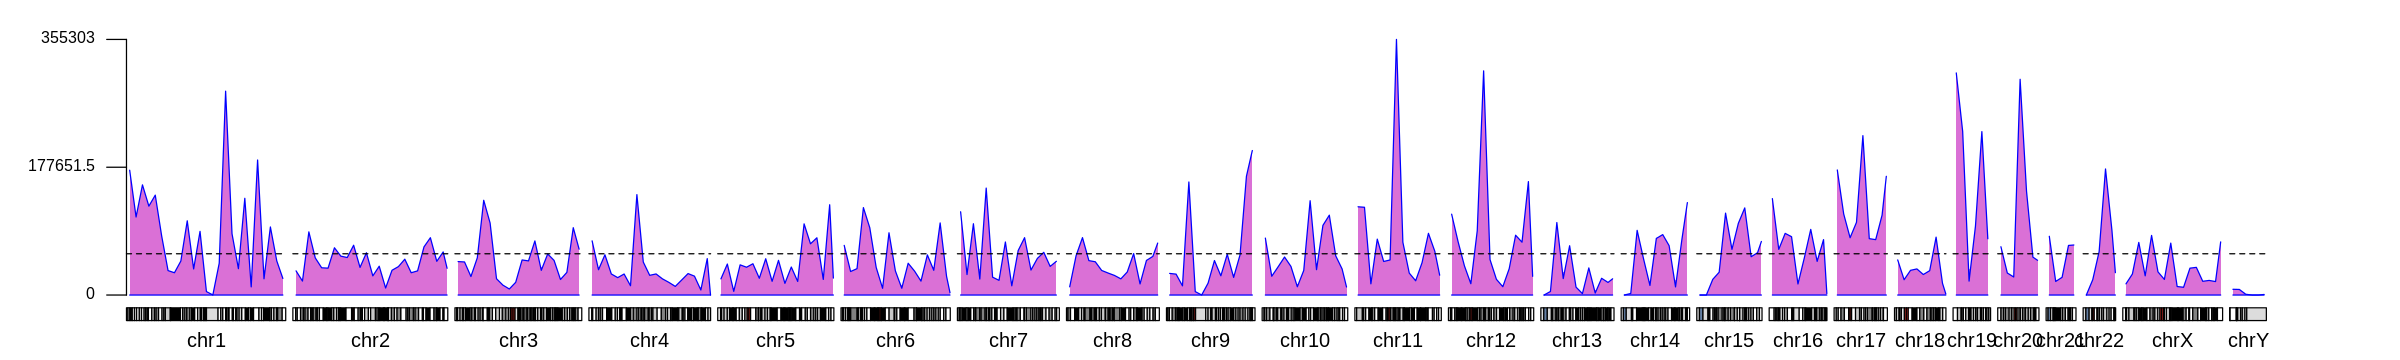

In [389]:
options(repr.plot.width=20, repr.plot.height=3)
kp <- plotKaryotype(genome="hg38", plot.type = 4)
kp <- suppressWarnings(kpPlotDensity(kp, data=UUd_MMr.to_rec.bed.gr, window.size = 10e6, border="blue", col="orchid"))
kpAxis(kp, ymax=kp$latest.plot$computed.values$max.density, cex=0.8)
kpAbline(kp, h=mean(kp$latest.plot$computed.values$density), lty=2, ymax=kp$latest.plot$computed.values$max.density)

In [417]:
custom.genome <- toGRanges(data.frame(chr=c("NC_002516.2"), start=c(1), end=c(6260000)))

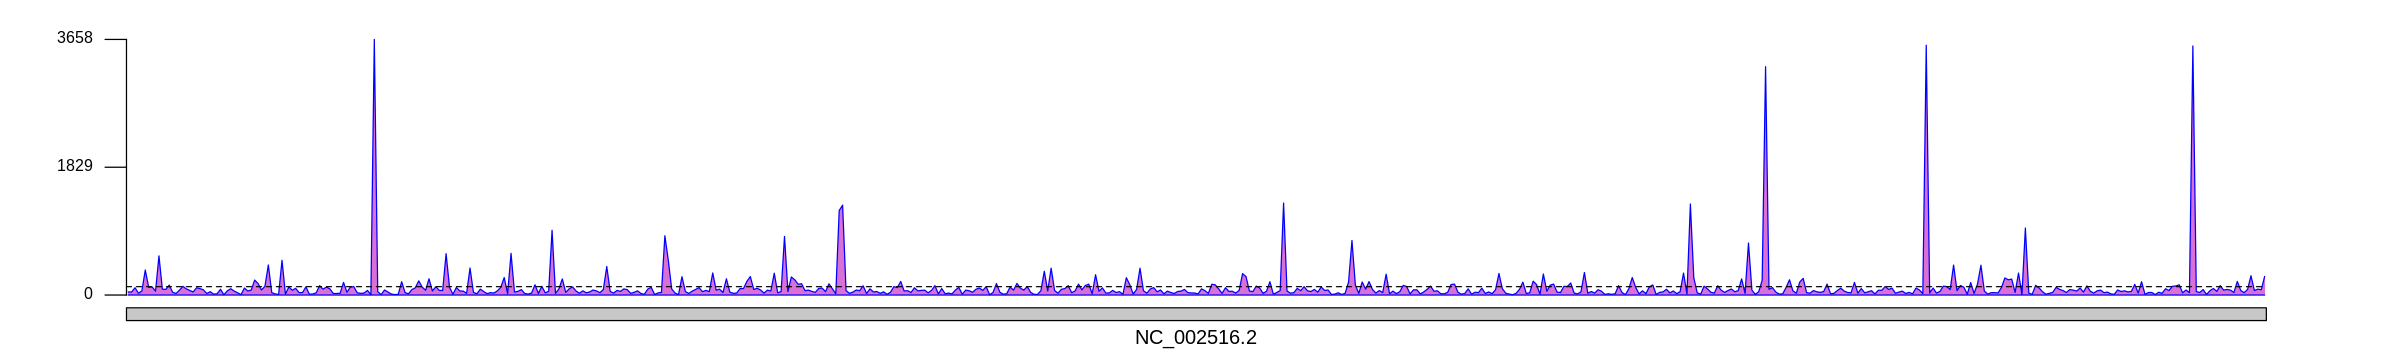

In [421]:
options(repr.plot.width=20, repr.plot.height=3)
kp <- plotKaryotype(genome=custom.genome, plot.type = 4)
kp <- suppressWarnings(kpPlotDensity(kp, data=MMd_MMr.to_don.bed.gr, window.size = 10e3, border="blue", col="orchid"))
kpAxis(kp, ymax=kp$latest.plot$computed.values$max.density, cex=0.8)
kpAbline(kp, h=mean(kp$latest.plot$computed.values$density), lty=2, ymax=kp$latest.plot$computed.values$max.density)